In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# dataset loading

fruits = pd.read_csv('/Users/DRepani/Documents/Datasets/fruits.csv')
fruits.shape

(60, 4)

In [3]:
# splitting data for lable and features

X = fruits[['sphericity', 'weight']]
y = fruits['label']

In [4]:
X.shape, y.shape

((60, 2), (60,))

In [6]:
# splitting training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape

((45, 2), (15, 2))

In [7]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

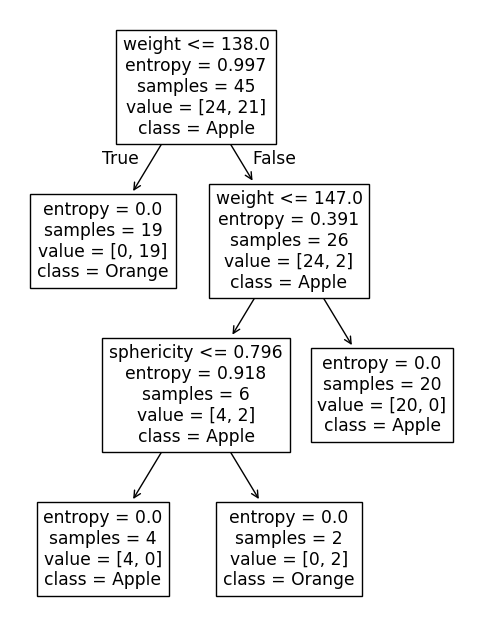

In [9]:
plt.figure(figsize=(6,8))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [13]:
result = export_text(model, feature_names=X.columns, show_weights=True, decimals=3)
print(result)

|--- weight <= 138.000
|   |--- weights: [0.000, 19.000] class: Orange
|--- weight >  138.000
|   |--- weight <= 147.000
|   |   |--- sphericity <= 0.796
|   |   |   |--- weights: [4.000, 0.000] class: Apple
|   |   |--- sphericity >  0.796
|   |   |   |--- weights: [0.000, 2.000] class: Orange
|   |--- weight >  147.000
|   |   |--- weights: [20.000, 0.000] class: Apple



In [14]:
y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [15]:
y_test.values

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [33]:
accuracy_score(y_predict, y_test)

0.9333333333333333

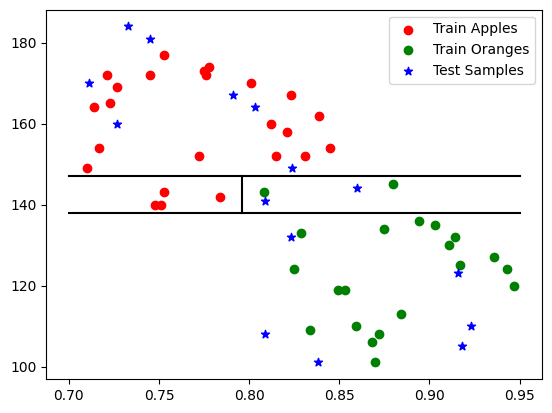

In [22]:
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Apple'], c='red', label='Train Apples')
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Orange'], c='green', label='Train Oranges')
plt.scatter(x='sphericity', y='weight', data=X_test, c='blue', marker='*', label = 'Test Samples')
plt.plot([0.70, 0.95], [138, 138], c='black')
plt.plot([0.70, 0.95],[147, 147], c='black')
plt.plot([0.796, 0.796],[138, 147], c='black')

plt.legend()
plt.show()


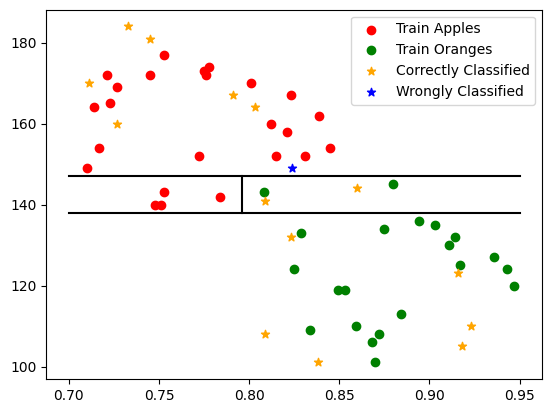

In [23]:
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Apple'], c='red', label='Train Apples')
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Orange'], c='green', label='Train Oranges')
plt.scatter(x='sphericity', y='weight', data=X_test[y_predict==y_test], c='orange', marker='*', label = 'Correctly Classified')
plt.scatter(x='sphericity', y='weight', data=X_test[y_predict!=y_test], c='blue', marker='*', label = 'Wrongly Classified')

plt.plot([0.70, 0.95], [138, 138], c='black')
plt.plot([0.70, 0.95],[147, 147], c='black')
plt.plot([0.796, 0.796],[138, 147], c='black')

plt.legend()
plt.show()

In [24]:
confusion_matrix(y_test, y_predict)

array([[6, 0],
       [1, 8]])

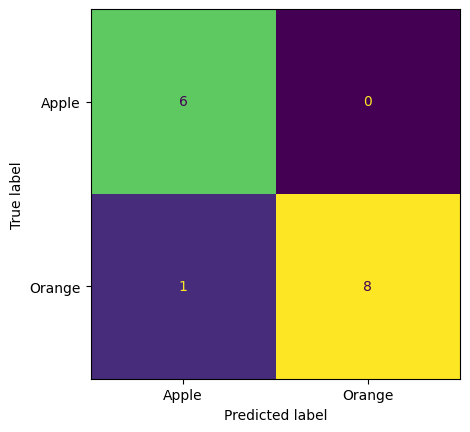

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, colorbar=False)
plt.show()